In [1]:
import numpy as np
import pandas as pd

In [2]:
# 一般来说数据的第一列index没有实际意义
train_df = pd.read_csv("../input/train.csv", index_col = 0)
test_df = pd.read_csv("../input/test.csv", index_col = 0)

In [3]:
#大致了解数据的样子，对数据进行preprocessing做准备
#head方法默认展示5行数据
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#合并train set和test set data。进行预处理。看似不合理，其实我们需要给模型的是处理后的数据，
#包括train data和test data。 合并起来处理，能简便很多。现实中我们只处理train data。。这里只是更方便

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c638828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117485e80>]], dtype=object)

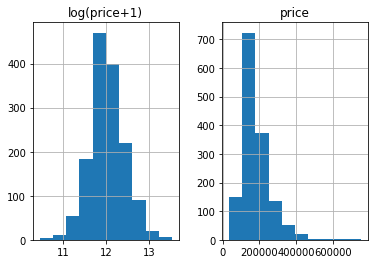

In [5]:
#test data里多了一列 --> 价钱
#原始数据并不平滑，所以用log函数进行平滑化（正态化）。如果不处理误差会很大。
#比如数据1，10，100，1000就不能直接用应该取log变为0，1，2，3。。这里处理后，最终结果需要逆处理一下。
#log1p就是 log(x+1)为了防止原来的值为0
%matplotlib inline
prices = pd.DataFrame({"price": train_df["SalePrice"], "log(price+1)":np.log1p(train_df["SalePrice"])})
prices.hist()

In [6]:
#这里取出train data的price那行
y_train = np.log1p(train_df.pop('SalePrice'))

In [7]:
all_df = pd.concat((train_df, test_df), axis = 0)

In [8]:
all_df.shape

(2919, 79)

In [9]:
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

In [10]:
#进行特征的处理，就是特征工程。。。。对不同的特征进行不同的处理。

In [11]:
#1.MSSubClass这是一个category 20，60只是个级别，并不是数据上的大小
all_df["MSSubClass"].dtypes

dtype('int64')

In [12]:
#之前的类型是整型，我们要做one hot，所以先转成字符串pd里get_dummies方法类似sklearn的one hot。。。
all_df["MSSubClass"] = all_df["MSSubClass"].astype(str)
pd.get_dummies(all_df["MSSubClass"], prefix='MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [13]:
#同理，对所有类别型的数据进行one hot
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [14]:
#有些数据是缺失的
#我们用平均值来代替，这个要看具体情况来看。。。有的我们可以用零代替，有的用平均值，有的用最多的类型那个之类的
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF2        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
GarageArea        1
dtype: int64

In [15]:
mean_cols = all_dummy_df.mean()
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [16]:
all_dummy_df.isnull().sum().sum()

0

In [17]:
#对那些原本是numeric的数据进行标准化normalization，不操作one hot那些数据
#先找到这些数据
numeric_cols = all_df.columns[all_df.dtypes != 'object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [18]:
#用原始数据减去均值，处以方差来normalization，这个方法逆操作复杂，所以不在price那里用
numeric_col_means = all_dummy_df.loc[:, numeric_cols].mean()
numeric_col_std = all_dummy_df.loc[:, numeric_cols].std()
all_dummy_df.loc[:, numeric_cols] = (all_dummy_df.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

In [19]:
#数据处理完后， 我们需要将train test数据分开

In [20]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]
dummy_train_df.shape, dummy_test_df.shape

((1460, 303), (1459, 303))

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [22]:
#为了以后更方便使用，DF转化成Numpy Array，在使用sklearn时经常用的是np
X_train = dummy_train_df.values
X_test = dummy_test_df.values

In [23]:
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))    
    test_scores.append(np.mean(test_score))

Text(0.5,1,'Alpha vs CV Error')

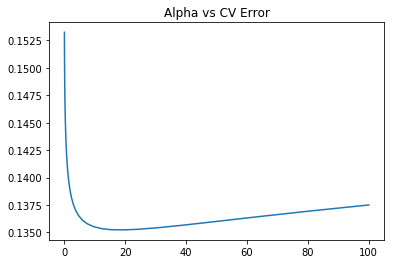

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error")

In [25]:
#我们选alpha为15
ridge = Ridge(15)

In [26]:
#Ensemble
from sklearn.ensemble import BaggingRegressor

In [27]:
params = [1, 10, 15, 20, 25, 30, 40]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5,1,'n_estimator vs CV Error')

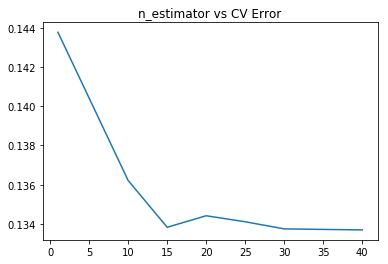

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error")
#取25个

In [29]:
#boosting
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
params = [10, 15, 20, 25, 30, 35, 40, 45, 50]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [ ]:
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error")

In [ ]:
#xgboosting
from xgboost import XGBRegressor

In [ ]:
params = [1,2,3,4,5,6]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("max_depth vs CV Error")